In [1]:
from __future__ import division, print_function, unicode_literals


import os
import math
import random
import keras.layers
import tensorflow as tf
import numpy as np
import imageio as io
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Layer, Input
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, MaxPooling2D
from keras.layers.core import Activation, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

Using TensorFlow backend.


In [2]:
labeled_images = "./labeled_images/"
training_images ="./training_images/"
test_images ="./test_images/"

# function to load images from folder sequentially 
def load_images(image_folder):
    
    img_names = sorted( [image_folder + p for p in os.listdir(image_folder) if p.endswith('.png')] )
    data = []
    
    for img_name in img_names:
        img = np.array(io.imread(img_name)[:,:,:3])
        data.append(img)
        
    return data,img_names

# Import images from different folders
img_labeled = load_images(labeled_images)
img_train = load_images(training_images)
img_test = load_images(test_images)


In [3]:
# Prepare Taining set with Labels 

# Define two empty numpy arrays with 500 pictures each for training & labeled images
img_train_cut = np.zeros((500,256,256,3))
img_label_cut = np.zeros((500,256,256,3))

# Fill numpy arrays with segmented images
for i in range (500):
    rand = np.random.randint(0,32)
    
    tren_img = img_train[0][rand]
    label_img = img_labeled[0][rand]
    
    h,w,n_c = tren_img.shape
    
    random_x=np.random.randint(0,h-256)
    random_y=np.random.randint(0,w-256)
    
    img_train_cut[i,:,:,:]=(tren_img[random_x:random_x+256,random_y:random_y+256,:])/255.
    img_label_cut[i,:,:,:]=(label_img[random_x:random_x+256,random_y:random_y+256,:])/255.  

In [4]:
# Choose testing image
test_num = 3
test_image = img_test[0][test_num]

# Prepare an empty set of segmented images
segment_test_image=np.zeros((10,256,256,3))

# segment a 1400 x 600 into 10 square images (missing some of the bottom image) because the original is not  
# square
for i in range (2):
    for n in range (5):
        segment_test_image[(n+1)*(i+1)-1,:,:,:]=( test_image[i*256:256*(i+1),n*256:256*(n+1),:] ) /255.
        

In [5]:
# CNN Model

input = Input(shape=(256, 256, 3))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)

conv1 = BatchNormalization()(conv1)

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)

conv1 = BatchNormalization()(conv1)

pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)

conv2 = BatchNormalization()(conv2)

conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)

conv2 = BatchNormalization()(conv2)

pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)

conv3 = BatchNormalization()(conv3)

conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

conv3 = BatchNormalization()(conv3)

conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

conv3 = BatchNormalization()(conv3)

pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool3)

conv4 = BatchNormalization()(conv4)

conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

conv4 = BatchNormalization()(conv4)

conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)

conv4 = BatchNormalization()(conv4)

pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool4)

conv5 = BatchNormalization()(conv5)

conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

conv5 = BatchNormalization()(conv5)

conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

conv5 = BatchNormalization()(conv5)

pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

ups6 = UpSampling2D()(pool5)

conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(ups6)

conv6 = BatchNormalization()(conv6)

conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)

conv6 = BatchNormalization()(conv6)

conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)

conv6 = BatchNormalization()(conv6)

ups7 = UpSampling2D()(conv6)

conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(ups7)

conv7 = BatchNormalization()(conv7)

conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)

conv7 = BatchNormalization()(conv7)

conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)

conv7 = BatchNormalization()(conv7)

ups8 = UpSampling2D()(conv7)

conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(ups8)

conv8 = BatchNormalization()(conv8)

conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)

conv8 = BatchNormalization()(conv8)

conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)

conv8 = BatchNormalization()(conv8)

ups9 = UpSampling2D()(conv8)

conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(ups9)

conv9 = BatchNormalization()(conv9)

conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

conv9 = BatchNormalization()(conv9)

ups10 = UpSampling2D()(conv9)

conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(ups10)

conv10 = BatchNormalization()(conv10)

conv10 = Conv2D(3, (3, 3), activation='relu', padding='same')(conv10)

conv10 = BatchNormalization()(conv10)

output = Activation("softmax")(conv10)



model = Model(inputs=input, outputs=output)



print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248      
__________

In [6]:
optim = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(img_train_cut, img_label_cut, epochs=30, batch_size=50, validation_split=0.2)

Train on 400 samples, validate on 100 samples
Epoch 1/30
400/400 [==============================] - 662s 2s/step - loss: 0.0981 - acc: 0.4397 - val_loss: 0.1890 - val_acc: 0.2540
Epoch 2/30
400/400 [==============================] - 646s 2s/step - loss: 0.0474 - acc: 0.4650 - val_loss: 0.1655 - val_acc: 0.5315
Epoch 3/30
400/400 [==============================] - 649s 2s/step - loss: 0.0307 - acc: 0.3953 - val_loss: 0.1737 - val_acc: 0.6342
Epoch 4/30
400/400 [==============================] - 646s 2s/step - loss: 0.0252 - acc: 0.4135 - val_loss: 0.1309 - val_acc: 0.6891
Epoch 5/30
400/400 [==============================] - 645s 2s/step - loss: 0.0231 - acc: 0.3639 - val_loss: 0.1149 - val_acc: 0.6502
Epoch 6/30
400/400 [==============================] - 645s 2s/step - loss: 0.0220 - acc: 0.3416 - val_loss: 0.0926 - val_acc: 0.4207
Epoch 7/30
400/400 [==============================] - 651s 2s/step - loss: 0.0205 - acc: 0.3260 - val_loss: 0.0531 - val_acc: 0.3050
Epoch 8/30
400/400 [===

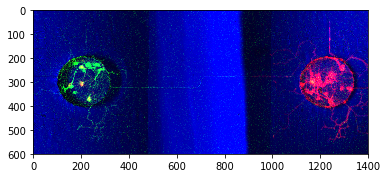

In [11]:
plt.imshow(img_test[0][test_num])

In [12]:
# test model 
result = model.predict(segment_test_image, batch_size=120, verbose=1, steps=None)

10/10 [==============================] - 4s 386ms/step


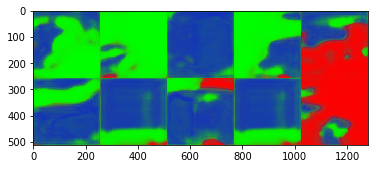

In [13]:
# Concatenate images lengthwise 
img_layer1 = np.concatenate((result[0], result[1],result[2], result[3], result[4]), axis=1)
img_layer2 = np.concatenate((result[5], result[6],result[7], result[8], result[9]), axis=1)
# Concatenate images vertically
full_image = np.concatenate((img_layer1, img_layer2), axis=0)

plt.imshow(full_image)

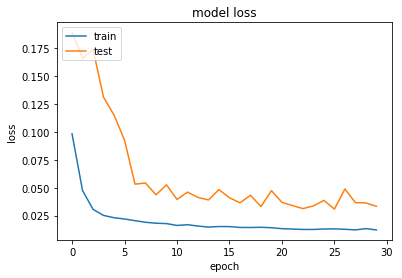

In [14]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()